In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices
from statsmodels.graphics.factorplots import interaction_plot
from statsmodels.stats.weightstats import ttost_ind
import matplotlib.pylab as pylab
from collections import defaultdict
from sklearn.decomposition import PCA
from itertools import chain, combinations

In [2]:
sns.set_palette("binary")
from plotting_utils import BOXPROPS, BOXPROPS2, meanlineprops, arguments, topics, argument_type
from plotting_utils import mean_stats, per_statement_boxplot, collected_boxplot,interval_distributions,LMM_results_and_plots,new_per_statement_boxplot,new_collected_boxplots

In [3]:
firsttask_columns = ['Q1_1', 'Q2_1', 'Q4_1', 'Q5_1']
midpoint_columns = ['Q1_midpoint','Q2_midpoint','Q4_midpoint','Q5_midpoint']

In [4]:
data = pd.read_csv("study2data.csv", index_col=0)
data1 = pd.read_csv("../study1/study1data.csv", index_col=0)

In [3]:
data.polAffil.value_counts()

Democrat      169
Republican    161
Name: polAffil, dtype: int64

In [8]:
data1[data1["polAffil"]=="Democrat"].gender.value_counts()

Female                       312
Male                         309
Non-binary / third gender     19
Prefer not to say              1
Name: gender, dtype: int64

In [7]:
mean_stats(data)

0.7267455621301775
0.6640683229813665
MannwhitneyuResult(statistic=15354.5, pvalue=0.021489033315244176)
0.5591863905325445
0.5771894409937889
MannwhitneyuResult(statistic=12782.0, pvalue=0.8289468612990314)
0.5061834319526627
0.5636645962732919
MannwhitneyuResult(statistic=12145.5, pvalue=0.045989666246572074)
0.5208210059171599
0.5095108695652174
MannwhitneyuResult(statistic=14591.5, pvalue=0.8728366938271113)


,Statement pol,Opinion D M (SD),Opinion R M (SD),Opinion D Mdn,Opinion R Mdn,Opinion Mann-Whitney,Belief D M (SD),Belief R M (SD),Belief D Mdn,Belief R Mdn,Belief Mann-Whitney,Wilcoxon D,Wilcoxon R
0,Democrat,0.7267 (0.2314),0.6641 (0.2708),0.775 [0.57 0.91],0.725 [0.495 0.885],0.021489,0.5592 (0.1097),0.5772 (0.1167),0.548 [0.5 0.6175],0.555 [0.5 0.62375],0.828947,4.186014e-16,0.000017
1,Republican,0.5062 (0.3142),0.5637 (0.3364),0.5 [0.245 0.78 ],0.6 [0.245 0.885],0.045990,0.5208 (0.1153),0.5095 (0.1131),0.509 [0.46 0.56375],0.499 [0.4625 0.55125],0.872837,4.770127e-01,0.025658


In [6]:
mean_stats(data1)

0.7192277691107644
0.619983844911147
MannwhitneyuResult(statistic=237635.0, pvalue=5.577323915139973e-10)
0.5854992199687987
0.5622374798061389
MannwhitneyuResult(statistic=217668.0, pvalue=0.0014148612100909287)
0.4434711388455538
0.5627786752827141
MannwhitneyuResult(statistic=158296.0, pvalue=2.5234577080309264e-10)
0.4832020280811233
0.5049555735056542
MannwhitneyuResult(statistic=179297.0, pvalue=0.001553804695860539)


,Statement pol,Opinion D M (SD),Opinion R M (SD),Opinion D Mdn,Opinion R Mdn,Opinion Mann-Whitney,Belief D M (SD),Belief R M (SD),Belief D Mdn,Belief R Mdn,Belief Mann-Whitney,Wilcoxon D,Wilcoxon R
0,Democrat,0.7192 (0.2557),0.62 (0.2867),0.775 [0.505 0.945],0.63 [0.46 0.875],5.577324e-10,0.5855 (0.141),0.5622 (0.1485),0.562 [0.5 0.685],0.538 [0.485 0.6475],0.001415,4.449321e-39,2.341367e-10
1,Republican,0.4435 (0.3505),0.5628 (0.3126),0.425 [0.115 0.765],0.565 [0.3375 0.85 ],2.523458e-10,0.4832 (0.1531),0.505 (0.1622),0.495 [0.405 0.55 ],0.508 [0.43375 0.5825 ],0.001554,6.867945e-04,1.685597e-07


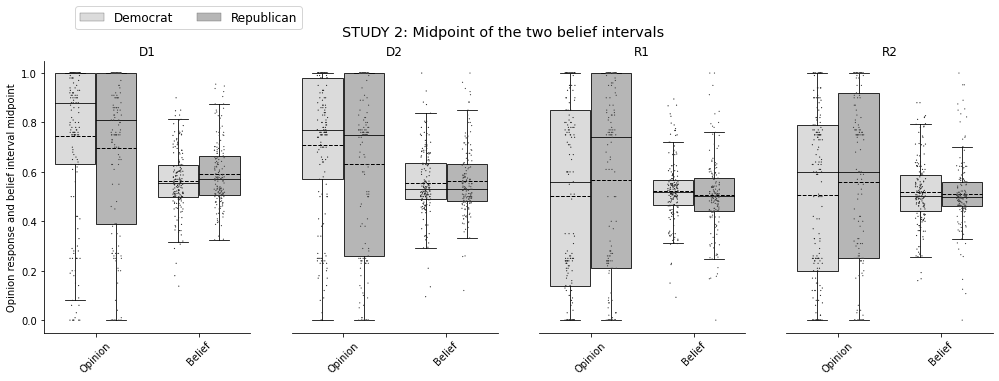

In [8]:
per_statement_boxplot(data,firsttask_columns,midpoint_columns)
plt.suptitle("STUDY 2: Midpoint of the two belief intervals",fontsize="x-large");
#plt.savefig("figures/study2boxplot1.pdf",bbox_inches='tight')

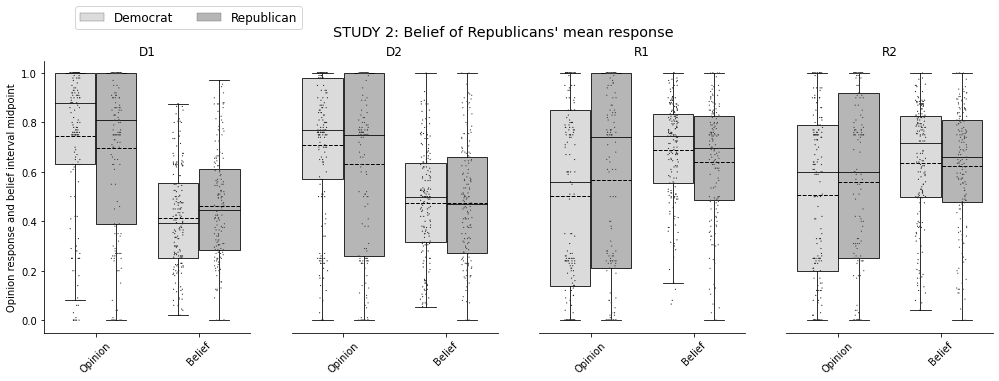

In [9]:
per_statement_boxplot(data,firsttask_columns,["Q1_R_midpoint", "Q2_R_midpoint","Q4_R_midpoint","Q5_R_midpoint"])
plt.suptitle("STUDY 2: Belief of Republicans' mean response",fontsize="x-large");
#plt.savefig("figures/study2boxplot2.pdf",bbox_inches='tight')

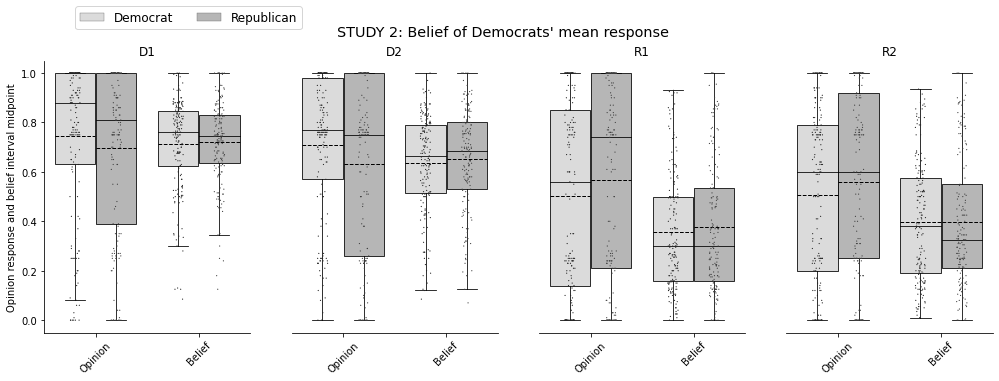

In [10]:
per_statement_boxplot(data,firsttask_columns,["Q1_D_midpoint", "Q2_D_midpoint","Q4_D_midpoint","Q5_D_midpoint"])
plt.suptitle("STUDY 2: Belief of Democrats' mean response",fontsize="x-large");
#plt.savefig("figures/study2boxplot3.pdf",bbox_inches='tight')

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Belief_Democrat vs. Belief_Republican: Mann-Whitney-Wilcoxon test greater, P_val:1.415e-03 U_stat=2.177e+05
Judgement_Democrat vs. Judgement_Republican: Mann-Whitney-Wilcoxon test greater, P_val:5.577e-10 U_stat=2.376e+05
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Judgement_Democrat vs. Belief_Democrat: Wilcoxon signed-rank, P_val:4.449e-39 Stat=3.944e+04
Judgement_Republican vs. Belief_Republican: Wilcoxon signed-rank, P_val:2.341e-10 Stat=6.535e+04
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Belief_Democrat vs. Belief_Republican: Mann-W

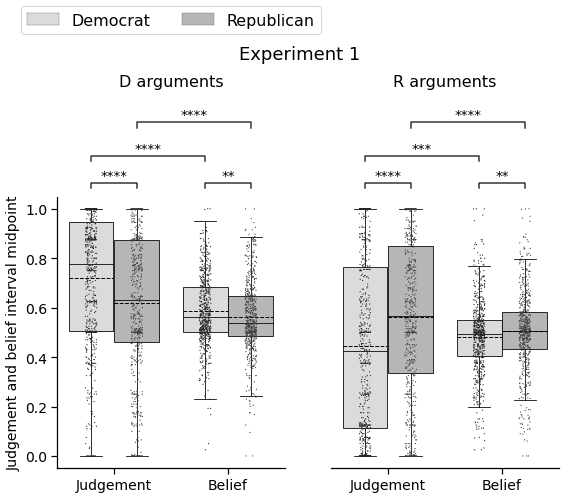

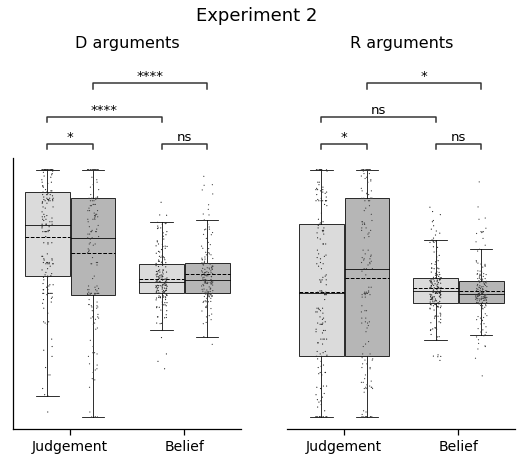

In [35]:
from statannotations.Annotator import Annotator
from matplotlib import rcParams
from statannotations.stats.StatTest import StatTest
from scipy.stats import wilcoxon, levene

# Required descriptors for annotate
custom_long_name = 'Wilcoxon signed-rank'
custom_short_name = 'Wilcoxon'
custom_func = wilcoxon
custom_test = StatTest(custom_func, custom_long_name, custom_short_name)

long_name = 'Levene'
short_name = 'Levene'
func = levene
custom_test_levene = StatTest(func, long_name, short_name)

rcParams['axes.titlepad'] = 110


def new_new_collected_boxplots(data,data1, firsttask_columns, midpoint_columns):
 # This function uses an ID which is not publicly available

    with sns.plotting_context('notebook', font_scale = 1.1):
        
        plt.rc('axes', labelsize=14)
        plt.rc('xtick', labelsize=14)
        plt.rc('ytick', labelsize=14)
        plt.rc('axes', titlesize=16)
        plt.rc('legend', fontsize=14) 
        plt.rc('figure', titlesize=18)
        

        text_format = "star"
        

        temp = data.melt(id_vars=["polAffil","ID"],value_vars=firsttask_columns+midpoint_columns)
        temp1 = data1.melt(id_vars=["polAffil","ID"],value_vars=firsttask_columns+midpoint_columns)


        temp["Task"] = ["Belief" if "midpoint" in i else "Judgement" for i in temp.variable]
        temp1["Task"] = ["Belief" if "midpoint" in i else "Judgement" for i in temp1.variable]

        
        temp["Statement"] = ["R arguments" if int(s[1])<4 else "D arguments" for s in temp.variable]
        temp1["Statement"] = ["R arguments" if int(s[1])<4 else "D arguments" for s in temp1.variable]

        temp = temp.groupby(by=["ID","polAffil","Task","Statement"],as_index=False).mean()
        
        temp1 = temp1.groupby(by=["ID","polAffil","Task","Statement"],as_index=False).mean()
        
        fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(9,5))
        
       

        pairs=[(("Judgement","Democrat"),("Judgement","Republican")),
                (("Belief","Democrat"),("Belief","Republican"))]
        
        pairs_within =[(("Judgement","Democrat"),("Belief","Democrat")),
                (("Judgement","Republican"),("Belief","Republican"))]

        count=0
        for ax, (n,grp) in zip(axes, temp.groupby("Statement")):
            sns.boxplot(x="Task", y="value", hue="polAffil", 
                        data=grp, 
                        ax=ax,
                        showfliers=False,
                        showmeans=True,
                        order=["Judgement","Belief"],
                        hue_order=["Democrat","Republican"],
                        meanline=True,
                        meanprops=meanlineprops,
                        **BOXPROPS2)
            sns.stripplot(x="Task", y="value", hue="polAffil",
                        dodge=True,
                        data=grp, 
                        ax=ax, 
                        color=".25",
                        size=1.2,
                        order=["Judgement","Belief"],
                        hue_order=["Democrat","Republican"])
            ax.set_title(n)
            
            ax.spines['right'].set_visible(False)
            ax.spines['top'].set_visible(False)
            ax.set(ylabel = "Judgement and belief interval midpoint")
            ax.set_xticklabels(ax.get_xticklabels())# rotation=45
            handles, labels = ax.get_legend_handles_labels()
            
            annotator = Annotator(ax, pairs, data=grp, x="Task", y="value",order=["Judgement","Belief"],hue="polAffil", hue_order=["Democrat","Republican"])
            if count==0:
                annotator.configure(test='Mann-Whitney-gt', text_format=text_format, loc='outside',comparisons_correction=None)
            else:
                annotator.configure(test='Mann-Whitney-ls', text_format=text_format, loc='outside',comparisons_correction=None)
            annotator.apply_and_annotate()
            count+=1
            annotator2 = Annotator(ax, pairs_within, data=grp, x="Task", y="value",order=["Judgement","Belief"],hue="polAffil", hue_order=["Democrat","Republican"])
            annotator2.configure(test=custom_test,text_format=text_format, loc='outside',comparisons_correction=None)# text_format='star'
           
            annotator2.apply_test().annotate(line_offset_to_group=0, line_offset=0.13)

        
            
        
        axes[1].spines['left'].set_visible(False)
        axes[1].get_yaxis().set_visible(False)
        axes[0].get_legend().remove()
        axes[1].get_legend().remove()
        axes[0].set_xlabel("")
        axes[1].set_xlabel("")
        fig.suptitle("Experiment 1",y=1.3)
        plt.legend(handles[0:2], labels[0:2],bbox_to_anchor=(-0.7, 1.7), loc="upper center", borderaxespad=0.,frameon=True,ncol=2,fontsize="large");

        plt.savefig("figures/study1boxplotMain.png",bbox_inches='tight')
        plt.savefig("figures/study1boxplotMain.pdf",bbox_inches='tight')

        fig2, axes2 = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(9,5))

        count=0
        for ax, (n,grp) in zip(axes2, temp1.groupby("Statement")):
            sns.boxplot(x="Task", y="value", hue="polAffil", 
                        data=grp, 
                        ax=ax,
                        showfliers=False,
                        showmeans=True,
                        order=["Judgement","Belief"],
                        hue_order=["Democrat","Republican"],
                        meanline=True,
                        meanprops=meanlineprops,
                        **BOXPROPS2)
            sns.stripplot(x="Task", y="value", hue="polAffil",
                        dodge=True,
                        data=grp, 
                        ax=ax, 
                        color=".25",
                        size=1.2,
                        order=["Judgement","Belief"],
                        hue_order=["Democrat","Republican"])
            ax.set_title(n)
            
            ax.spines['right'].set_visible(False)
            ax.spines['top'].set_visible(False)
            ax.set(ylabel = "Judgement and belief interval midpoint")
            ax.set_xticklabels(ax.get_xticklabels())
            handles, labels = ax.get_legend_handles_labels()

            annotator = Annotator(ax, pairs, data=grp, x="Task", y="value",order=["Judgement","Belief"],hue="polAffil", hue_order=["Democrat","Republican"])
            if count==0:
                annotator.configure(test='Mann-Whitney-gt', text_format=text_format, loc='outside',comparisons_correction=None)
            else:
                annotator.configure(test='Mann-Whitney-ls', text_format=text_format, loc='outside',comparisons_correction=None)
            annotator.apply_and_annotate()
            count+=1
            annotator2 = Annotator(ax, pairs_within, data=grp.sort_values(by=["ID"]), x="Task", y="value",order=["Judgement","Belief"],hue="polAffil", hue_order=["Democrat","Republican"])
            annotator2.configure(test=custom_test,text_format=text_format, loc='outside', comparisons_correction=None)# text_format='star'
            
            annotator2.apply_test().annotate(line_offset_to_group=0.0, line_offset=0.13)
            

        axes2[0].get_legend().remove()
        axes2[1].get_legend().remove()
        axes2[0].get_yaxis().set_visible(False)
        axes2[1].get_yaxis().set_visible(False)
        axes2[1].spines['left'].set_visible(False)
        axes2[0].set_xlabel("")
        axes2[1].set_xlabel("")
        fig2.suptitle("Experiment 2",y=1.3)
        
        plt.savefig("figures/study2boxplotMain.pdf",bbox_inches='tight')
        plt.savefig("figures/study2boxplotMain.png",bbox_inches='tight')
        
    

new_new_collected_boxplots(data1,data,firsttask_columns,midpoint_columns)


#plt.savefig("figures/study1_and_2boxplotMain.pdf",bbox_inches='tight')
#plt.subplots_adjust(wspace=0.0, hspace=0)
#plt.subplots_adjust(top=.9)


In [105]:
stats.wilcoxon(data.sort_values(by=["ID"])[data.sort_values(by=["ID"]).polAffil=="Democrat"][['Q1_1','Q2_1']].mean(axis=1).values,
data.sort_values(by=["ID"])[data.sort_values(by=["ID"]).polAffil=="Democrat"][['Q1_midpoint','Q2_midpoint']].mean(axis=1).values)

WilcoxonResult(statistic=6649.0, pvalue=0.4770127035681443)

In [106]:
stats.wilcoxon(data[data.polAffil=="Democrat"][['Q1_1','Q2_1']].mean(axis=1).values,
data[data.polAffil=="Democrat"][['Q1_midpoint','Q2_midpoint']].mean(axis=1).values)

WilcoxonResult(statistic=6649.0, pvalue=0.4770127035681443)

In [ ]:
temp = data.melt(id_vars=["polAffil","ID"],value_vars=['Q4_1','Q5_1'])
temp["Statement"] = ["R arguments" if int(s[1])<4 else "D arguments" for s in temp.variable]

temp = temp.groupby(by=["ID","polAffil","Statement"],as_index=False).mean()
temp[temp.polAffil=="Democrat"]

In [79]:
temp = data.melt(id_vars=["polAffil","ID"],value_vars=firsttask_columns+midpoint_columns)
temp = temp.groupby(by=["ID","polAffil","Task","Statement"],as_index=False).mean()

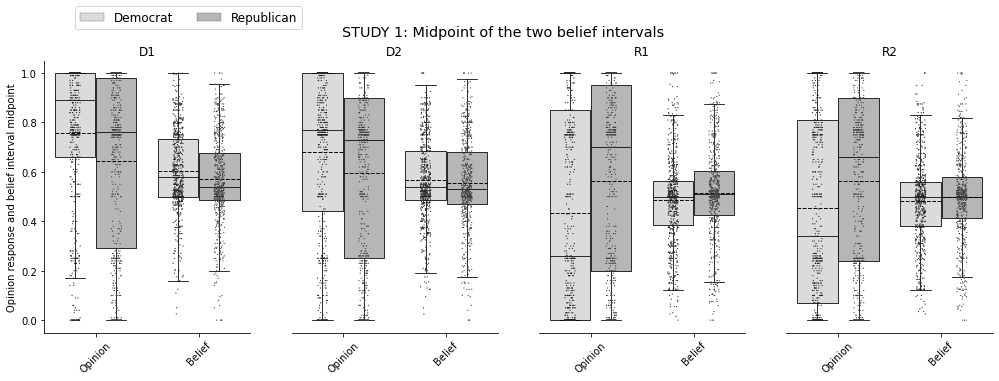

In [12]:
per_statement_boxplot(data1,firsttask_columns,midpoint_columns)
plt.suptitle("STUDY 1: Midpoint of the two belief intervals",fontsize="x-large");
#plt.savefig("figures/study1boxplot1.pdf",bbox_inches='tight')

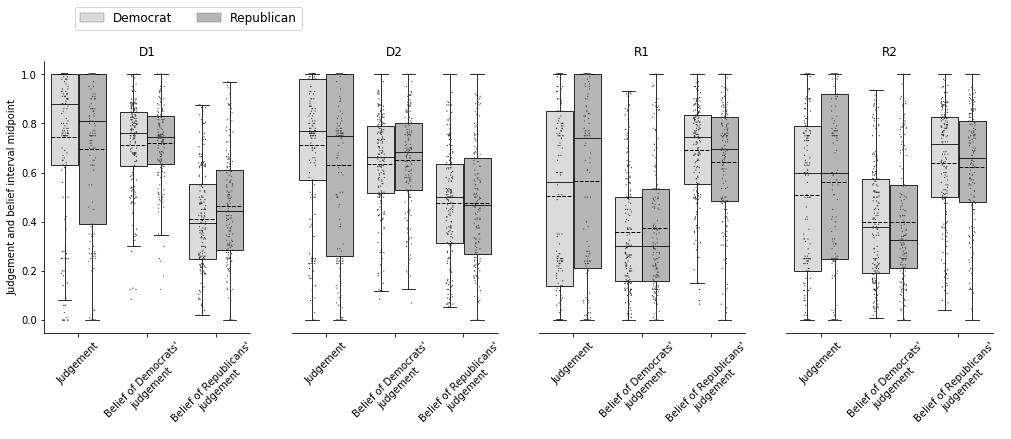

In [6]:
new_per_statement_boxplot(data,firsttask_columns,["Q1_D_midpoint", "Q2_D_midpoint","Q4_D_midpoint","Q5_D_midpoint","Q1_R_midpoint", "Q2_R_midpoint","Q4_R_midpoint","Q5_R_midpoint"])
#plt.savefig("figures/study2beliefboxplot.pdf",bbox_inches='tight')

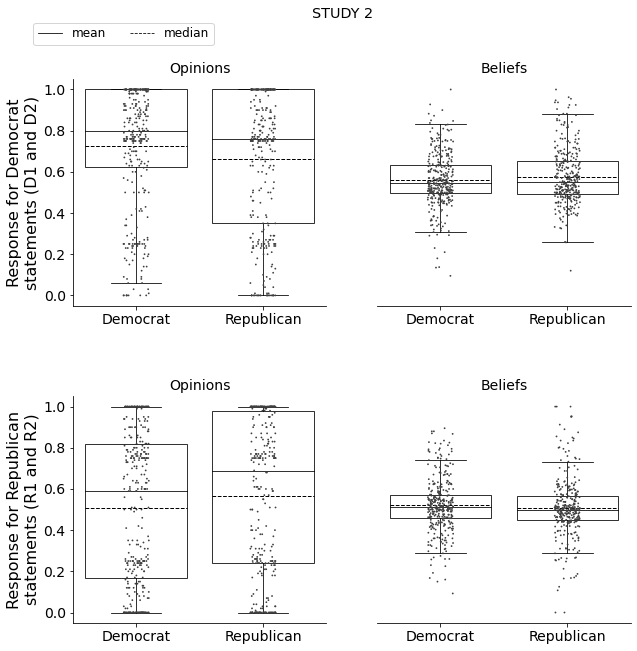

In [13]:
collected_boxplot(data, firsttask_columns,midpoint_columns)
plt.suptitle("STUDY 2",fontsize="x-large");
#plt.savefig("figures/study2collectedboxplot1.pdf",bbox_inches='tight')



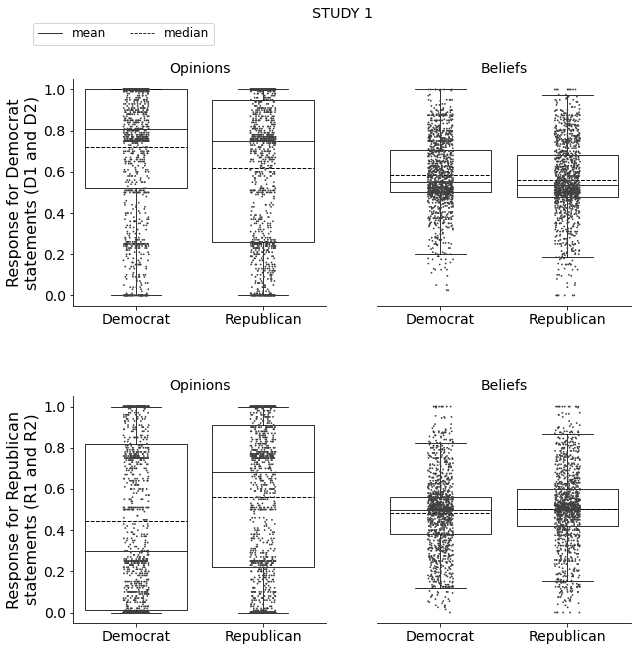

In [22]:
data1.sort_values(by=["polAffil"], inplace=True)
collected_boxplot(data1, firsttask_columns,midpoint_columns)
plt.suptitle("STUDY 1",fontsize="x-large");
plt.savefig("figures/study1collectedboxplot.pdf",bbox_inches='tight')


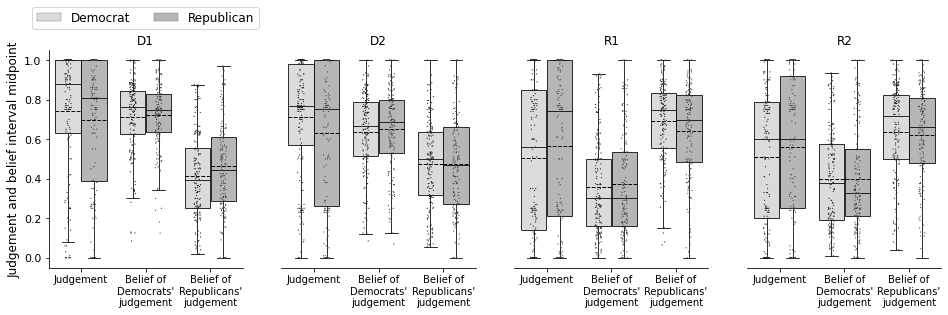

In [23]:
def new_new_per_statement_boxplot(data,firsttask_columns,midpoint_columns):

    plt.rc('axes', labelsize=12)
    
    plt.rc('ytick', labelsize=11)
    
    
    temp = data.melt(id_vars=["polAffil"],value_vars=firsttask_columns+midpoint_columns)

    task_var = []
    for i in temp.variable:
        if "R_midpoint" in i:
            task_var.append("Belief of\nRepublicans'\njudgement")
        elif "D_midpoint" in i:
            task_var.append("Belief of\nDemocrats'\njudgement")
        else:
            task_var.append("Judgement")

    temp["Task"] = task_var
    
    temp["Statement"] = ["R"+s[1] if int(s[1])<4 else "D"+str(int(s[1])-3) for s in temp.variable]

    fig, axes = plt.subplots(ncols=4, sharex=True, sharey=True, figsize=(16,4))
    for ax, (n,grp) in zip(axes, temp.groupby("Statement")):
        sns.boxplot(x="Task", y="value", hue="polAffil", 
                    data=grp, 
                    ax=ax,
                    showfliers=False,
                    showmeans=True,
                    hue_order=["Democrat","Republican"],
                    meanline=True,
                    meanprops=meanlineprops,
                    **BOXPROPS2)
        sns.stripplot(x="Task", y="value", hue="polAffil",
                    dodge=True,
                    data=grp, 
                    ax=ax, 
                    color=".25",
                    size=1.2,
                    hue_order=["Democrat","Republican"])
        ax.set_title(n)
        
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.set(ylabel = "Judgement and belief interval midpoint")
        ax.set_xticklabels(ax.get_xticklabels())#rotation=45
        handles, labels = ax.get_legend_handles_labels()
        
    axes[1].spines['left'].set_visible(False)
    axes[2].spines['left'].set_visible(False)
    axes[3].spines['left'].set_visible(False)
    
    axes[0].get_legend().remove()
    axes[1].get_legend().remove()
    axes[2].get_legend().remove()
    axes[3].get_legend().remove()
    
    axes[1].get_yaxis().set_visible(False)
    axes[2].get_yaxis().set_visible(False)
    axes[3].get_yaxis().set_visible(False)
    
    axes[0].set_xlabel("")
    axes[1].set_xlabel("")
    axes[2].set_xlabel("")
    axes[3].set_xlabel("")
   

    plt.legend(handles[0:2], labels[0:2],bbox_to_anchor=(-3.1, 1.2), loc="upper center", borderaxespad=0.,frameon=True,ncol=2,fontsize="large");
    

new_new_per_statement_boxplot(data,firsttask_columns,["Q1_D_midpoint", "Q2_D_midpoint","Q4_D_midpoint","Q5_D_midpoint","Q1_R_midpoint", "Q2_R_midpoint","Q4_R_midpoint","Q5_R_midpoint"])
#plt.savefig("figures/study2beliefboxplot2.pdf",bbox_inches='tight')
#plt.savefig("figures/study2beliefboxplot2.png",bbox_inches='tight')

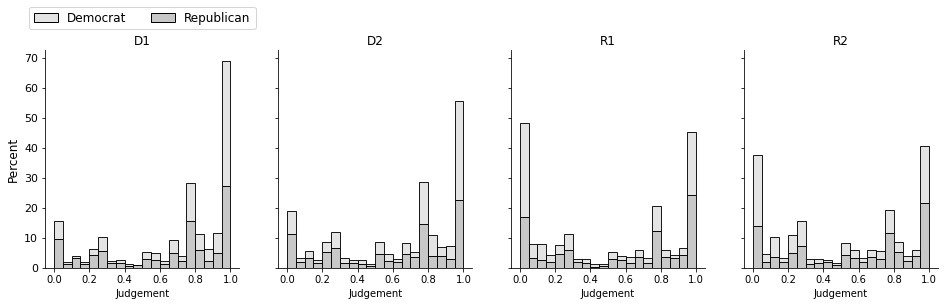

In [136]:
def per_statement_histplot(data,firsttask_columns):

    plt.rc('axes', labelsize=12)
    
    
    temp = data.melt(id_vars=["polAffil"],value_vars=firsttask_columns)


    temp["Statement"] = ["R"+s[1] if int(s[1])<4 else "D"+str(int(s[1])-3) for s in temp.variable]

    fig, axes = plt.subplots(ncols=4, sharex=True, sharey=True, figsize=(16,4))
    for ax, (n,grp) in zip(axes, temp.groupby("Statement")):
        sns.histplot(x="value", hue="polAffil",data=grp,ax=ax, multiple="stack", common_norm=False,stat="percent",bins=20,
        hue_order=["Democrat","Republican"])
        ax.set_title(n)
        ax.set_xlabel("Judgement",size=10)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        sns.move_legend(ax,bbox_to_anchor=(-3.1, 1.2), loc="upper center", borderaxespad=0.,frameon=True,ncol=2,fontsize="large",title=None)

    axes[0].get_legend().remove()
    axes[1].get_legend().remove()
    axes[2].get_legend().remove()

    
    
    
#per_statement_histplot(data1,firsttask_columns)

#plt.savefig("figures/study1judgementDist.pdf",bbox_inches='tight')
#plt.savefig("figures/study1judgementDist.png",bbox_inches='tight')
    

Democrat M and Mdn: 1.7633136094674555 1.0 [0. 3.]
Republican M and Mdn: 7.645962732919255 8.0 [7. 9.]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


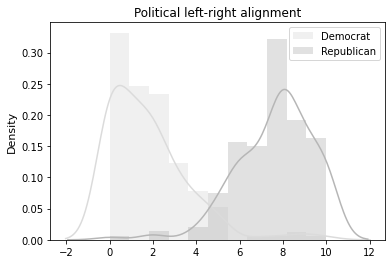

In [71]:
def plot_polalign(data):
    

    target0 = data[data.polAffil=="Democrat"]
    target1 = data[data.polAffil=="Republican"]
    print("Democrat M and Mdn:",np.mean(target0['polAlign_1'].values),np.median(target0['polAlign_1'].values), np.quantile(target0['polAlign_1'].values,[0.25,0.75]))
    print("Republican M and Mdn:",np.mean(target1['polAlign_1'].values),np.median(target1['polAlign_1'].values),np.quantile(target1['polAlign_1'].values,[0.25,0.75]))

    sns.distplot(target0[['polAlign_1']], hist=True,label="Democrat",bins=11)
    sns.distplot(target1[['polAlign_1']], hist=True,label="Republican",bins=11)

    plt.legend()
    plt.title("Political left-right alignment")

plot_polalign(data)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


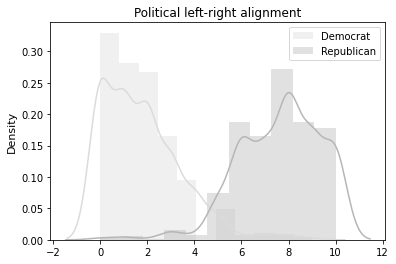

In [56]:

plot_polalign(data1)

Democrat M and Mdn: 1.7790123456790123 1.0 [0. 3.]
Republican M and Mdn: 7.633333333333334 8.0 [6. 9.]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


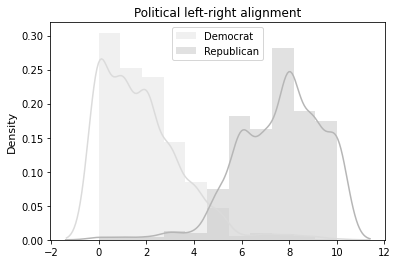

In [72]:
plot_polalign(pd.concat([data1,data]))
#plt.savefig("figures/leftrightalignment.pdf",bbox_inches='tight')
#plt.savefig("figures/leftrightalignment.png",bbox_inches='tight')

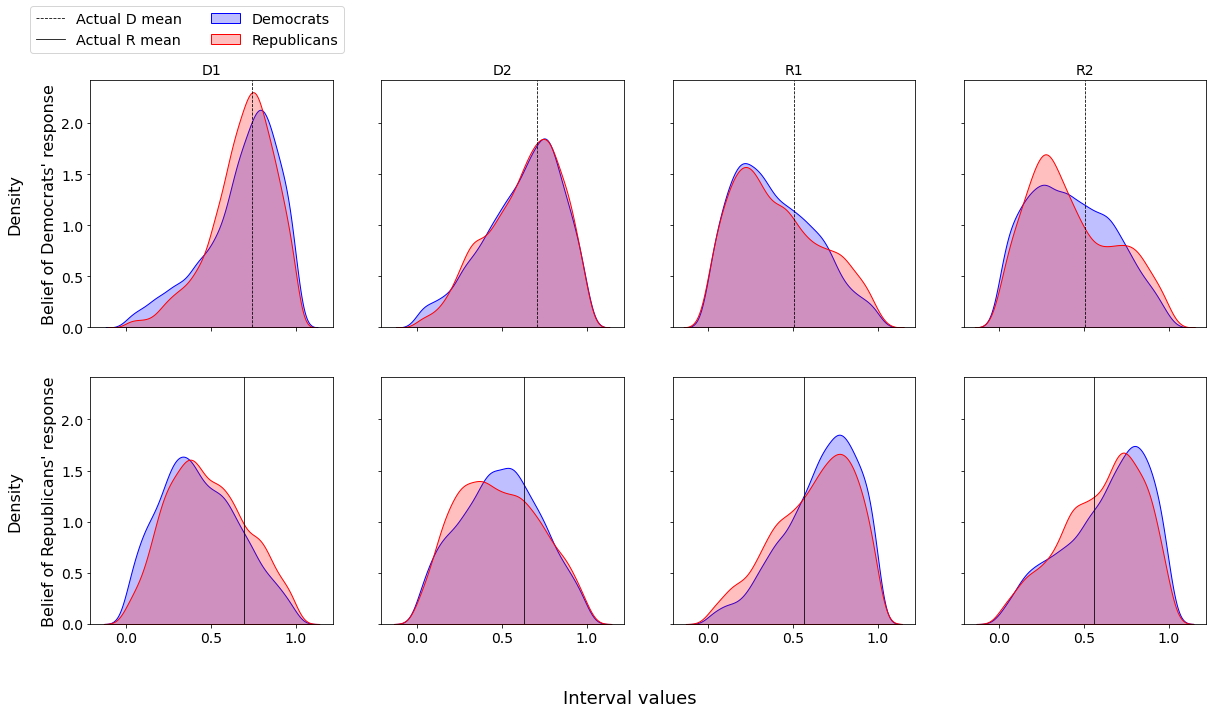

In [16]:
interval_distributions(data)
#plt.savefig("figures/study2intervalDensityplots.pdf",bbox_inches='tight')


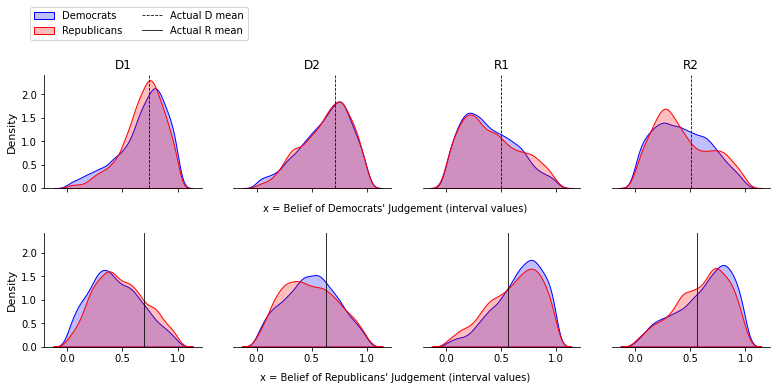

In [37]:
def new_interval_distributions(data):
    plt.rc('axes', labelsize=11)
    plt.rc('ytick', labelsize=10)
    
    lower_bound_columns_R =  ['Q1_2_R_3', 'Q2_2_R_1',
                            'Q4_2_R_1', 'Q5_2_R_1']

    upper_bound_columns_R = ['Q1_2_R_4',  'Q2_2_R_2',
                        'Q4_2_R_2', 'Q5_2_R_2']

    lower_bound_columns_D =  ['Q1_2_D_3', 'Q2_2_D_1',
                            'Q4_2_D_1', 'Q5_2_D_1']

    upper_bound_columns_D = ['Q1_2_D_4',  'Q2_2_D_2',
                        'Q4_2_D_2', 'Q5_2_D_2']
    
    firsttask_columns = ['Q1_1', 'Q2_1', 'Q4_1', 'Q5_1']

    
    R = data[data.polAffil=="Republican"]
    D = data[data.polAffil=="Democrat"]


    #fig, ax = plt.subplots(2,4, sharey=True,sharex=True, figsize=(8,4)) #small and compact
    fig, ax = plt.subplots(2,4, sharey=True,sharex=True, figsize=(13,5))

    for indel,s in enumerate([2,3,0,1]):

        if s==0:
            statement = "R1"
        elif s==1:
            statement = "R2"
        elif s==2:
            statement = "D1"
        else:
            statement = "D2"


        
        Rintervals_Rbeliefs = []
        Rintervals_Dbeliefs = []

        Dintervals_Rbeliefs = []
        Dintervals_Dbeliefs = []
        
        for i in range(len(R)):
            #print(i)
            interval_Republicans_R = np.arange(R.iloc[i][lower_bound_columns_R[s]],
                                            R.iloc[i][upper_bound_columns_R[s]]+0.01,
                                            0.01)
            Rintervals_Rbeliefs.extend(interval_Republicans_R)

            interval_Republicans_D = np.arange(R.iloc[i][lower_bound_columns_D[s]],
                                            R.iloc[i][upper_bound_columns_D[s]]+0.01,
                                            0.01)
            Rintervals_Dbeliefs.extend(interval_Republicans_D)

        for i in range(len(D)):
            #print(i)
            interval_Democrats_R = np.arange(D.iloc[i][lower_bound_columns_R[s]],
                                            D.iloc[i][upper_bound_columns_R[s]]+0.01,
                                            0.01)
            Dintervals_Rbeliefs.extend(interval_Democrats_R)

            interval_Democrats_D = np.arange(D.iloc[i][lower_bound_columns_D[s]],
                                            D.iloc[i][upper_bound_columns_D[s]]+0.01,
                                            0.01)
            Dintervals_Dbeliefs.extend(interval_Democrats_D)
        
        
        sns.kdeplot(Dintervals_Dbeliefs, shade=True, label="Democrats", color="b",ax=ax[0,indel])
        sns.kdeplot(Rintervals_Dbeliefs, shade=True, label="Republicans", color="r",ax=ax[0,indel])

        ax[0,indel].set_title(statement)
        
        
        sns.kdeplot(Dintervals_Rbeliefs, shade=True, label="Democrats", color="b", ax=ax[1,indel])
        sns.kdeplot(Rintervals_Rbeliefs, shade=True, label="Republicans", color="r", ax=ax[1,indel])
        
        # only one line may be specified; full height
        curr_Dmean = D[firsttask_columns[s]].mean()
        ax[0,indel].axvline(x=curr_Dmean, label='Actual D mean', linestyle="--",c="black", linewidth=0.8)
        
        ax[1,indel].plot([], [], '--', linewidth=0.8, color="black", label='Actual D mean')
        curr_Rmean = R[firsttask_columns[s]].mean()
        ax[1,indel].axvline(x=curr_Rmean, label='Actual R mean',linestyle="-",c="black",linewidth=0.8)
        

        for ax_curr in ax.flatten():
            ax_curr.spines['right'].set_visible(False)
            ax_curr.spines['top'].set_visible(False)
        
        ax[0,1].spines['left'].set_visible(False)
        ax[0,1].get_yaxis().set_visible(False)
        ax[0,2].spines['left'].set_visible(False)
        ax[0,2].get_yaxis().set_visible(False)
        ax[0,3].spines['left'].set_visible(False)
        ax[0,3].get_yaxis().set_visible(False)

        ax[1,1].spines['left'].set_visible(False)
        ax[1,1].get_yaxis().set_visible(False)
        ax[1,2].spines['left'].set_visible(False)
        ax[1,2].get_yaxis().set_visible(False)
        ax[1,3].spines['left'].set_visible(False)
        ax[1,3].get_yaxis().set_visible(False)
    
    plt.legend(bbox_to_anchor=(-3, 3), loc="upper center", 
    borderaxespad=0.,frameon=True,ncol=2, fontsize="medium")# -2.7

    fig.text(x=0.5,y=0.03, s="x = Belief of Republicans' Judgement (interval values)",horizontalalignment='center')
    fig.text(x=0.5,y=0.5, s="x = Belief of Democrats' Judgement (interval values)",horizontalalignment='center')

    plt.subplots_adjust(hspace=0.4)


new_interval_distributions(data)

#plt.savefig("figures/study2intervalDensityplots2.pdf",bbox_inches='tight')
#plt.savefig("figures/study2intervalDensityplots2.png",bbox_inches='tight')

In [5]:
LMM_results_and_plots(data1)

Opinion                Mixed Linear Model Regression Results
Model:                 MixedLM     Dependent Variable:     value    
No. Observations:      2520        Method:                 REML     
No. Groups:            1260        Scale:                  0.0780   
Min. group size:       2           Log-Likelihood:         -769.4378
Max. group size:       2           Converged:              Yes      
Mean group size:       2.0                                          
--------------------------------------------------------------------
                          Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------------------
Intercept                  0.719    0.011 67.045 0.000  0.698  0.740
C(polAffil)[T.Republican] -0.099    0.015 -6.484 0.000 -0.129 -0.069
Group Var                  0.035    0.015                           

Belief                 Mixed Linear Model Regression Results
Model:                 MixedLM      Dependent Var

,D statements,R statements
Opinion ~ Republican,8.915643e-11,1.969495e-10
Belief ~ Republican,4.374150e-03,1.441790e-02


In [7]:

demargs_midpoint = pd.melt(data1, id_vars=["ID","polAffil","educ","gender","age","Condition"],
                                value_vars=['Q4_midpoint','Q5_midpoint'])

repargs_midpoint = pd.melt(data1, id_vars=["ID","polAffil","educ","gender","age","Condition"],
                                value_vars=['Q1_midpoint', 'Q2_midpoint'])

model = smf.mixedlm("value ~ C(Condition)",
                            demargs_midpoint,groups=demargs_midpoint["ID"])
res = model.fit()

print(res.summary())

            Mixed Linear Model Regression Results
Model:               MixedLM   Dependent Variable:   value   
No. Observations:    2520      Method:               REML    
No. Groups:          1260      Scale:                0.0184  
Min. group size:     2         Log-Likelihood:       930.4479
Max. group size:     2         Converged:            Yes     
Mean group size:     2.0                                     
-------------------------------------------------------------
                    Coef. Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------
Intercept           0.566    0.006 96.865 0.000  0.555  0.578
C(Condition)[T.1.0] 0.015    0.008  1.842 0.065 -0.001  0.031
Group Var           0.012    0.009                           



In [8]:
model = smf.mixedlm("value ~ C(Condition)",
                            repargs_midpoint,groups=repargs_midpoint["ID"])
res = model.fit()

print(res.summary())

            Mixed Linear Model Regression Results
Model:                MixedLM   Dependent Variable:   value   
No. Observations:     2520      Method:               REML    
No. Groups:           1260      Scale:                0.0174  
Min. group size:      2         Log-Likelihood:       855.4994
Max. group size:      2         Converged:            Yes     
Mean group size:      2.0                                     
--------------------------------------------------------------
                    Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------------
Intercept            0.495    0.006 77.619 0.000  0.482  0.507
C(Condition)[T.1.0] -0.001    0.009 -0.155 0.877 -0.019  0.016
Group Var            0.016    0.011                           



In [6]:
LMM_results_and_plots(data)

Opinion                Mixed Linear Model Regression Results
Model:                 MixedLM     Dependent Variable:     value    
No. Observations:      660         Method:                 REML     
No. Groups:            330         Scale:                  0.0763   
Min. group size:       2           Log-Likelihood:         -176.6619
Max. group size:       2           Converged:              Yes      
Mean group size:       2.0                                          
--------------------------------------------------------------------
                          Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------------------
Intercept                  0.727    0.019 37.472 0.000  0.689  0.765
C(polAffil)[T.Republican] -0.063    0.028 -2.257 0.024 -0.117 -0.008
Group Var                  0.025    0.025                           



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


Belief                Mixed Linear Model Regression Results
Model:                 MixedLM     Dependent Variable:     value   
No. Observations:      660         Method:                 REML    
No. Groups:            330         Scale:                  0.0099  
Min. group size:       2           Log-Likelihood:         421.2297
Max. group size:       2           Converged:              Yes     
Mean group size:       2.0                                         
-------------------------------------------------------------------
                          Coef. Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------------
Intercept                 0.559    0.009 64.033 0.000  0.542  0.576
C(polAffil)[T.Republican] 0.018    0.013  1.440 0.150 -0.007  0.043
Group Var                 0.008    0.014                           

Opinion                Mixed Linear Model Regression Results
Model:                MixedLM     Dependent Variable:     valu

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


,D statements,R statements
Opinion ~ Republican,0.023990,0.109628
Belief ~ Republican,0.149878,0.370029


In [19]:
LMM_results_and_plots(data1)

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: value    
No. Observations: 2520    Method:             REML     
No. Groups:       1260    Scale:              0.0740   
Min. group size:  2       Log-Likelihood:     -992.7862
Max. group size:  2       Converged:          Yes      
Mean group size:  2.0                                  
-------------------------------------------------------
              Coef. Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept     0.419    0.016 26.363 0.000  0.388  0.451
polAlign_1    0.018    0.003  6.432 0.000  0.012  0.023
Group Var     0.074    0.023                           



,D statements,R statements
Opinion ~ Republican,8.915643e-11,1.969495e-10
Belief ~ Republican,4.374150e-03,1.441790e-02


In [8]:
LMM_results_and_plots(data, control_gender=True, control_age=True, control_educ=True)

Opinion                Mixed Linear Model Regression Results
Model:                 MixedLM     Dependent Variable:     value    
No. Observations:      660         Method:                 REML     
No. Groups:            330         Scale:                  0.0763   
Min. group size:       2           Log-Likelihood:         -176.6619
Max. group size:       2           Converged:              Yes      
Mean group size:       2.0                                          
--------------------------------------------------------------------
                          Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------------------
Intercept                  0.727    0.019 37.472 0.000  0.689  0.765
C(polAffil)[T.Republican] -0.063    0.028 -2.257 0.024 -0.117 -0.008
Group Var                  0.025    0.025                           

gender control                       Mixed Linear Model Regression Results
Model:                      MixedLM

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


Belief                Mixed Linear Model Regression Results
Model:                 MixedLM     Dependent Variable:     value   
No. Observations:      660         Method:                 REML    
No. Groups:            330         Scale:                  0.0099  
Min. group size:       2           Log-Likelihood:         421.2297
Max. group size:       2           Converged:              Yes     
Mean group size:       2.0                                         
-------------------------------------------------------------------
                          Coef. Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------------
Intercept                 0.559    0.009 64.033 0.000  0.542  0.576
C(polAffil)[T.Republican] 0.018    0.013  1.440 0.150 -0.007  0.043
Group Var                 0.008    0.014                           



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


gender control                       Mixed Linear Model Regression Results
Model:                     MixedLM          Dependent Variable:          value   
No. Observations:          660              Method:                      REML    
No. Groups:                330              Scale:                       0.0099  
Min. group size:           2                Log-Likelihood:              416.3068
Max. group size:           2                Converged:                   Yes     
Mean group size:           2.0                                                   
---------------------------------------------------------------------------------
                                       Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------------------------
Intercept                               0.564    0.011 51.398 0.000  0.543  0.586
C(polAffil)[T.Republican]               0.017    0.013  1.371 0.170 -0.007  0.042
C(gender)[T.Male]      

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


control age                Mixed Linear Model Regression Results
Model:                  MixedLM     Dependent Variable:     value   
No. Observations:       660         Method:                 REML    
No. Groups:             330         Scale:                  0.0099  
Min. group size:        2           Log-Likelihood:         415.6014
Max. group size:        2           Converged:              Yes     
Mean group size:        2.0                                         
--------------------------------------------------------------------
                          Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------------------
Intercept                  0.587    0.021 27.731 0.000  0.546  0.629
C(polAffil)[T.Republican]  0.021    0.013  1.677 0.094 -0.004  0.046
age                       -0.001    0.000 -1.456 0.145 -0.002  0.000
Group Var                  0.008    0.014                           



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


gender educ                                                Mixed Linear Model Regression Results
Model:                                       MixedLM                          Dependent Variable:                          value   
No. Observations:                            660                              Method:                                      REML    
No. Groups:                                  330                              Scale:                                       0.0099  
Min. group size:                             2                                Log-Likelihood:                              402.1803
Max. group size:                             2                                Converged:                                   Yes     
Mean group size:                             2.0                                                                                   
---------------------------------------------------------------------------------------------------------------

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


Belief                Mixed Linear Model Regression Results
Model:                  MixedLM     Dependent Variable:     value   
No. Observations:       660         Method:                 REML    
No. Groups:             330         Scale:                  0.0127  
Min. group size:        2           Log-Likelihood:         378.5482
Max. group size:        2           Converged:              Yes     
Mean group size:        2.0                                         
--------------------------------------------------------------------
                          Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------------------
Intercept                  0.521    0.009 59.098 0.000  0.504  0.538
C(polAffil)[T.Republican] -0.011    0.013 -0.896 0.370 -0.036  0.013
Group Var                  0.007    0.013                           



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


gender control                       Mixed Linear Model Regression Results
Model:                     MixedLM          Dependent Variable:          value   
No. Observations:          660              Method:                      REML    
No. Groups:                330              Scale:                       0.0127  
Min. group size:           2                Log-Likelihood:              373.6042
Max. group size:           2                Converged:                   Yes     
Mean group size:           2.0                                                   
---------------------------------------------------------------------------------
                                       Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------------------------
Intercept                               0.525    0.011 47.434 0.000  0.504  0.547
C(polAffil)[T.Republican]              -0.012    0.013 -0.947 0.344 -0.037  0.013
C(gender)[T.Male]      

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


control age                Mixed Linear Model Regression Results
Model:                  MixedLM     Dependent Variable:     value   
No. Observations:       660         Method:                 REML    
No. Groups:             330         Scale:                  0.0127  
Min. group size:        2           Log-Likelihood:         372.0215
Max. group size:        2           Converged:              Yes     
Mean group size:        2.0                                         
--------------------------------------------------------------------
                          Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------------------
Intercept                  0.510    0.021 23.804 0.000  0.468  0.552
C(polAffil)[T.Republican] -0.013    0.013 -0.978 0.328 -0.038  0.013
age                        0.000    0.001  0.546 0.585 -0.001  0.001
Group Var                  0.007    0.013                           



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


gender educ                                                 Mixed Linear Model Regression Results
Model:                                       MixedLM                           Dependent Variable:                           value   
No. Observations:                            660                               Method:                                       REML    
No. Groups:                                  330                               Scale:                                        0.0127  
Min. group size:                             2                                 Log-Likelihood:                               362.3555
Max. group size:                             2                                 Converged:                                    Yes     
Mean group size:                             2.0                                                                                     
--------------------------------------------------------------------------------------------------

,D statements,R statements
Opinion ~ Republican,0.023990,0.109628
Opinion ~ Republican + gender,0.028509,0.098218
Opinion ~ Republican + age,0.016890,0.119912
Opinion ~ Republican + educ,0.048242,0.167021
Belief ~ Republican,0.149878,0.370029
Belief ~ Republican + gender,0.170465,0.343513
Belief ~ Republican + age,0.093538,0.328139
Belief ~ Republican + educ,0.064504,0.436528


In [7]:
LMM_results_and_plots(data1, control_gender=True, control_age=True, control_educ=True)

Opinion                Mixed Linear Model Regression Results
Model:                 MixedLM     Dependent Variable:     value    
No. Observations:      2520        Method:                 REML     
No. Groups:            1260        Scale:                  0.0780   
Min. group size:       2           Log-Likelihood:         -769.4378
Max. group size:       2           Converged:              Yes      
Mean group size:       2.0                                          
--------------------------------------------------------------------
                          Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------------------
Intercept                  0.719    0.011 67.045 0.000  0.698  0.740
C(polAffil)[T.Republican] -0.099    0.015 -6.484 0.000 -0.129 -0.069
Group Var                  0.035    0.015                           

gender control                       Mixed Linear Model Regression Results
Model:                      MixedLM

,D statements,R statements
Opinion ~ Republican,8.915643e-11,1.969495e-10
Opinion ~ Republican + gender,9.736632e-11,6.697300e-10
Opinion ~ Republican + age,1.629596e-10,6.239341e-10
Opinion ~ Republican + educ,4.671884e-10,4.618906e-10
Belief ~ Republican,4.374150e-03,1.441790e-02
Belief ~ Republican + gender,5.041311e-03,2.321639e-02
Belief ~ Republican + age,5.873140e-03,2.110568e-02
Belief ~ Republican + educ,6.060481e-03,1.576892e-02


169
0.05353408319036448
0.012037540702356362
0.04149654248800812
PermutationTestResult(statistic=0.04149654248800812, pvalue=0.00019998000199980003, null_distribution=array([-0.00422463, -0.00381367,  0.00089939, ..., -0.00354642,
        0.01391588,  0.00942183]))
169
0.0987444574769791
0.013294139188928961
0.08545031828805014
PermutationTestResult(statistic=0.08545031828805014, pvalue=0.00019998000199980003, null_distribution=array([-0.00282684, -0.00676799,  0.01534184, ..., -0.00180118,
        0.00667217,  0.00687994]))
161
0.07331310713321244
0.01362061395683037
0.059692493176382075
PermutationTestResult(statistic=0.059692493176382075, pvalue=0.00019998000199980003, null_distribution=array([-0.0061107 , -0.01413639,  0.00824648, ...,  0.0006083 ,
       -0.01602867,  0.02059599]))
161
0.11318439682111028
0.012785251822846342
0.10039914499826394
PermutationTestResult(statistic=0.10039914499826394, pvalue=0.00019998000199980003, null_distribution=array([-0.00567801, -0.00483822, -0

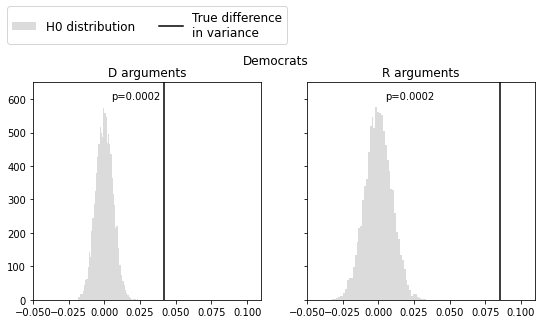

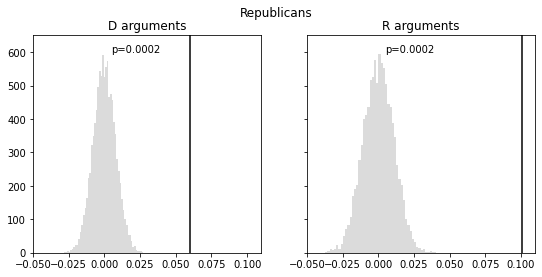

In [32]:
from calendar import different_locale


def stat_permute(x,y):
    return np.var(x)-np.var(y)



def permutations(data,study):
    # This function uses an ID which is not publicly available
    temp = data.melt(id_vars=["polAffil","ID"],value_vars=firsttask_columns+midpoint_columns)
    
    temp["Task"] = ["Belief" if "midpoint" in i else "Judgement" for i in temp.variable]
  
    temp["Statement"] = ["R arguments" if int(s[1])<4 else "D arguments" for s in temp.variable]
    
    temp = temp.groupby(by=["ID","polAffil","Task","Statement"],as_index=False).mean()

    for j in ["Democrat","Republican"]:
        fig, axes = plt.subplots(1,2, sharex=True, sharey=True,figsize=(9,4))
        for ax, (n,grp) in zip(axes, temp.groupby("Statement")):
            print(len(grp[(grp.polAffil==j)&(grp.Task=="Judgement")]))
            judgements = grp[(grp.polAffil==j)&(grp.Task=="Judgement")].value
            beliefs = grp[(grp.polAffil==j)&(grp.Task=="Belief")].value
            print(np.var(judgements))
            print(np.var(beliefs))
            diff = stat_permute(judgements,beliefs)
            print(diff)
            res = stats.permutation_test((judgements,beliefs),
                                    stat_permute,
                                    permutation_type="samples",
                                    n_resamples = 10000
            )
            print(res)
            ax.hist(res.null_distribution, bins=50,label="H0 distribution")
            ax.axvline(x=diff,color="black",label="True difference\nin variance")
            ax.annotate("p="+str(np.round(res.pvalue,4)),(0.005,600))
            ax.set_xlim(xmin=-0.05, xmax=0.11)
            ax.set_ylim(ymin=0,ymax=650)
            ax.set_title(n)
            #ax.get_legend().remove()
            handles, labels = ax.get_legend_handles_labels()
            #ax.get_legend().remove()

        
        if j=="Democrat":
            plt.legend(handles[0:2], labels[0:2],bbox_to_anchor=(-0.7, 1.35), loc="upper center", borderaxespad=0.,frameon=True,ncol=2,fontsize="large");
        fig.suptitle(j+"s")

        plt.savefig("figures/study{}permute{}.pdf".format(study,j),bbox_inches='tight')
        plt.savefig("figures/study{}permute{}.png".format(study,j),bbox_inches='tight')


permutations(data,study=2)

641
0.06540583891686402
0.01987812441436815
0.045527714502495875
PermutationTestResult(statistic=0.045527714502495875, pvalue=0.00019998000199980003, null_distribution=array([ 0.00149362,  0.00483224,  0.00067629, ..., -0.00214132,
        0.00096438,  0.00161174]))
641
0.12287098551648776
0.023451944754077216
0.09941904076241054
PermutationTestResult(statistic=0.09941904076241054, pvalue=0.00019998000199980003, null_distribution=array([-0.00319604, -0.00458733, -0.00341117, ..., -0.00040812,
       -0.00087642, -0.00591479]))
619
0.08218747954515204
0.022054888676039577
0.06013259086911246
PermutationTestResult(statistic=0.06013259086911246, pvalue=0.00019998000199980003, null_distribution=array([-0.00411768,  0.00178737,  0.00073698, ..., -0.00341611,
        0.00040302,  0.00066856]))
619
0.0977112611930755
0.026305622016593543
0.07140563917648195
PermutationTestResult(statistic=0.07140563917648195, pvalue=0.00019998000199980003, null_distribution=array([ 0.00563087,  0.00179964, -0

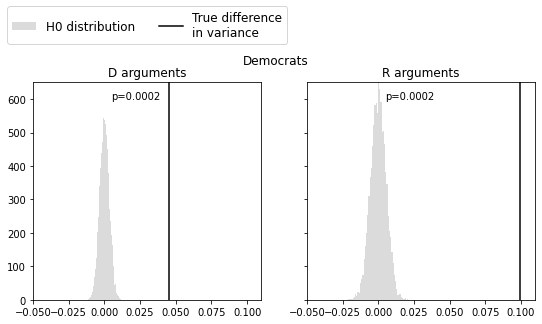

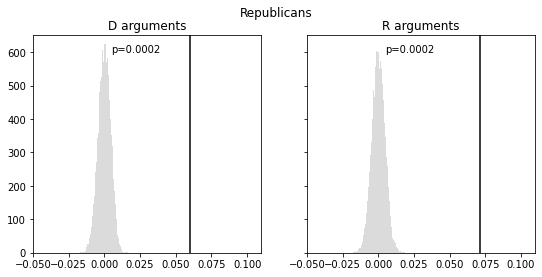

In [33]:
permutations(data1,study=1)